# Regressão Logística

A Organização Mundial da Saúde estima que 12 milhões de mortes ocorrem em todo o mundo, todos os anos, devido a doenças cardíacas. Metade das mortes nos Estados Unidos e em outros países desenvolvidos são causadas por doenças cardiovasculares. O diagnóstico precoce dessas doenças pode ajudar na tomada de decisões sobre mudanças no estilo de vida de pacientes de alto risco e, por sua vez, reduzir as complicações. Esta pesquisa pretende identificar os fatores de risco mais relevantes para doenças cardíacas, bem como prever o risco geral usando regressão logística.

In [2]:
#Importação das bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
import statistics as sts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
#Importação dos dados

base = pd.read_csv('framingham.csv')
base.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Traduzindo nome das colunas para pt-br

base.columns = [
    'sexo', 'idade', 'educacao','fumanteAtual', 'cigarrosPorDia', 'medicacaoPA', 
    'AVCPrevalente', 'hipertensaoPrevalente', 'diabetes', 'colesterolTotal', 
    'pressaoSistolica', 'pressaoDiastolica', 'IMC', 'frequenciaCardieca', 'glicose', 'DCdezAnos' 
    ]

In [5]:
#Verificando a troca dos nomes das colunas

base.head()

,sexo,idade,educacao,fumanteAtual,cigarrosPorDia,medicacaoPA,AVCPrevalente,hipertensaoPrevalente,diabetes,colesterolTotal,pressaoSistolica,pressaoDiastolica,IMC,frequenciaCardieca,glicose,DCdezAnos
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#Verificando a quantidade de linhas e colunas do dataset

base.shape

(4238, 16)

In [7]:
#Verificando colunas com valores NA's

base.isnull().sum()

sexo                       0
idade                      0
educacao                 105
fumanteAtual               0
cigarrosPorDia            29
medicacaoPA               53
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal           50
pressaoSistolica           0
pressaoDiastolica          0
IMC                       19
frequenciaCardieca         1
glicose                  388
DCdezAnos                  0
dtype: int64

Tratando Valores NA´s

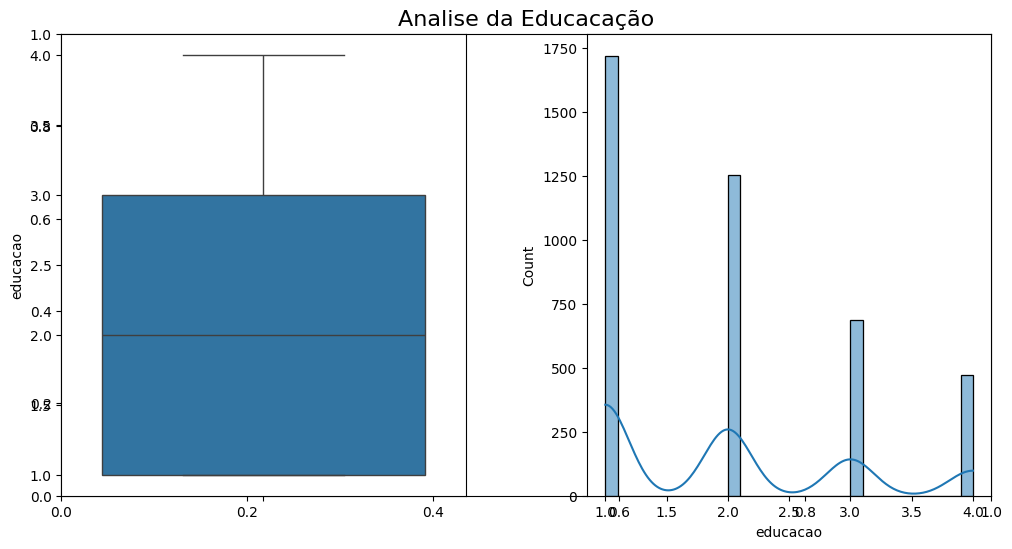

In [8]:
# Coluna educacao

plt.figure(figsize=(12, 6))
plt.title('Analise da Educacação', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['educacao'])
plt.subplot(1,2,2)
sns.histplot(base['educacao'], kde = True, bins=30)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [9]:
# Trocando os NA´s pela mediana

median = sts.median(base['educacao'])
base['educacao'] = base['educacao'].fillna(median)
base.isnull().sum()

sexo                       0
idade                      0
educacao                   0
fumanteAtual               0
cigarrosPorDia            29
medicacaoPA               53
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal           50
pressaoSistolica           0
pressaoDiastolica          0
IMC                       19
frequenciaCardieca         1
glicose                  388
DCdezAnos                  0
dtype: int64

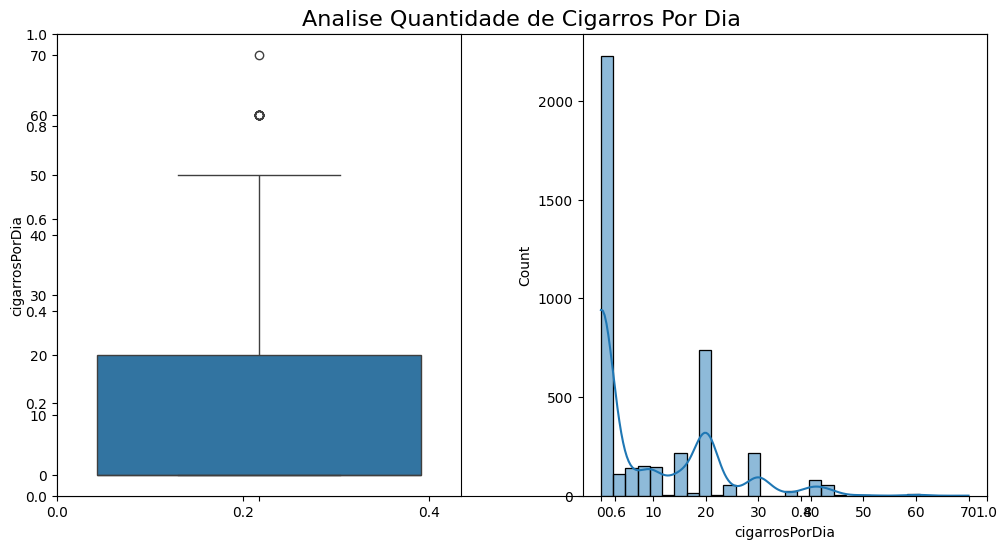

In [10]:
#Coluna cigarrosPorDia

plt.figure(figsize=(12,6))
plt.title('Analise Quantidade de Cigarros Por Dia', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['cigarrosPorDia'])
plt.subplot(1,2,2)
sns.histplot(base['cigarrosPorDia'], kde = True, bins=30)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [11]:
# Trocando os NA´s pela mediana

median = sts.median(base['cigarrosPorDia'])
base['cigarrosPorDia'] = base['cigarrosPorDia'].fillna(median)
base.isnull().sum()

sexo                       0
idade                      0
educacao                   0
fumanteAtual               0
cigarrosPorDia             0
medicacaoPA               53
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal           50
pressaoSistolica           0
pressaoDiastolica          0
IMC                       19
frequenciaCardieca         1
glicose                  388
DCdezAnos                  0
dtype: int64

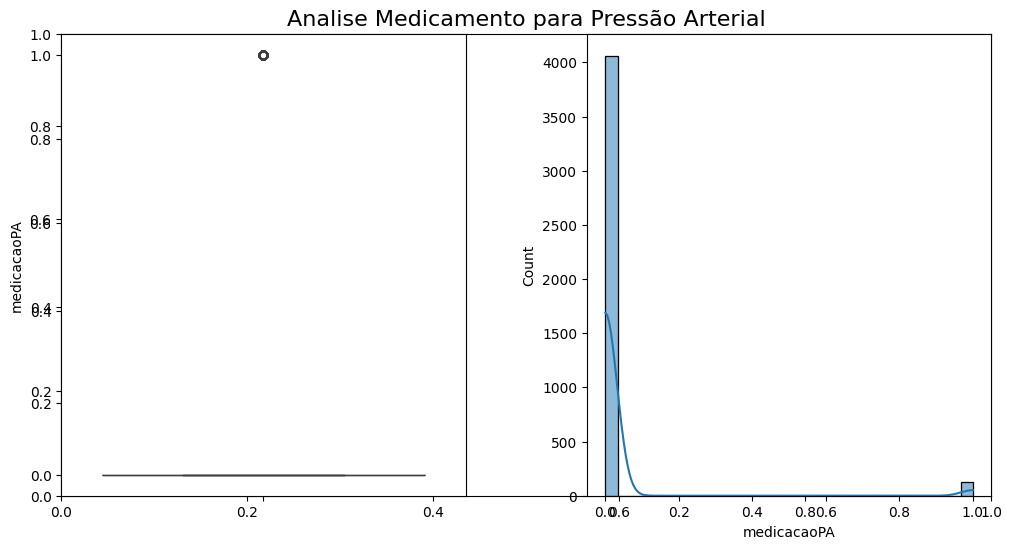

In [12]:
#Coluna medicacaoPA

plt.figure(figsize=(12, 6))
plt.title('Analise Medicamento para Pressão Arterial', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['medicacaoPA'])
plt.subplot(1,2,2)
sns.histplot(base['medicacaoPA'], kde = True, bins=30)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [13]:
# Trocando os NA´s pela mediana

median = sts.median(base['medicacaoPA'])
base['medicacaoPA'] = base['medicacaoPA'].fillna(median)
base.isnull().sum()

sexo                       0
idade                      0
educacao                   0
fumanteAtual               0
cigarrosPorDia             0
medicacaoPA                0
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal           50
pressaoSistolica           0
pressaoDiastolica          0
IMC                       19
frequenciaCardieca         1
glicose                  388
DCdezAnos                  0
dtype: int64

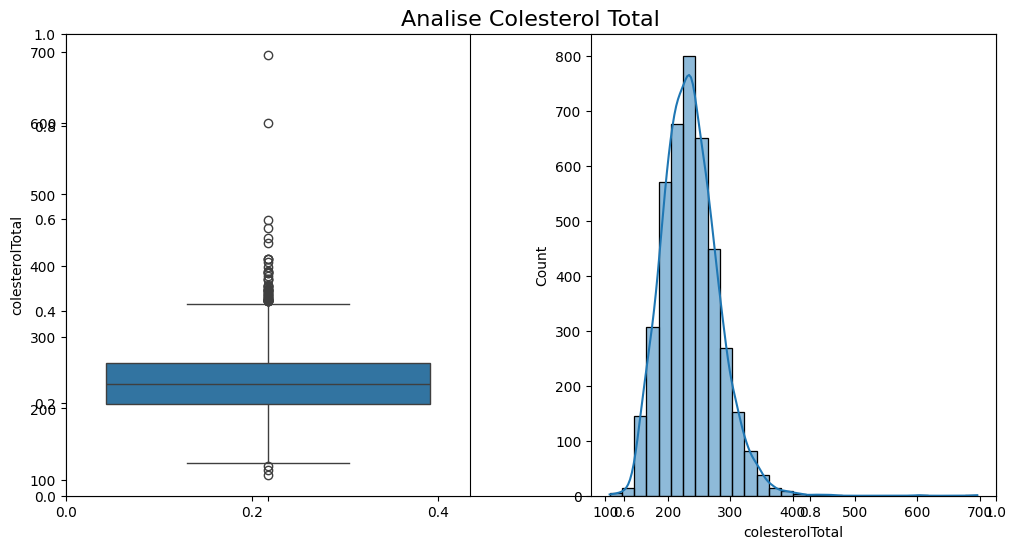

In [14]:
#Coluna colesterol

plt.figure(figsize=(12, 6))
plt.title('Analise Colesterol Total', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['colesterolTotal'])
plt.subplot(1,2,2)
sns.histplot(base['colesterolTotal'], kde = True, bins=30)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [15]:
# Trocando os NA´s pela mediana

median = sts.median(base['colesterolTotal'])
base['colesterolTotal'] = base['colesterolTotal'].fillna(median)
base.isnull().sum()

sexo                       0
idade                      0
educacao                   0
fumanteAtual               0
cigarrosPorDia             0
medicacaoPA                0
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal            0
pressaoSistolica           0
pressaoDiastolica          0
IMC                       19
frequenciaCardieca         1
glicose                  388
DCdezAnos                  0
dtype: int64

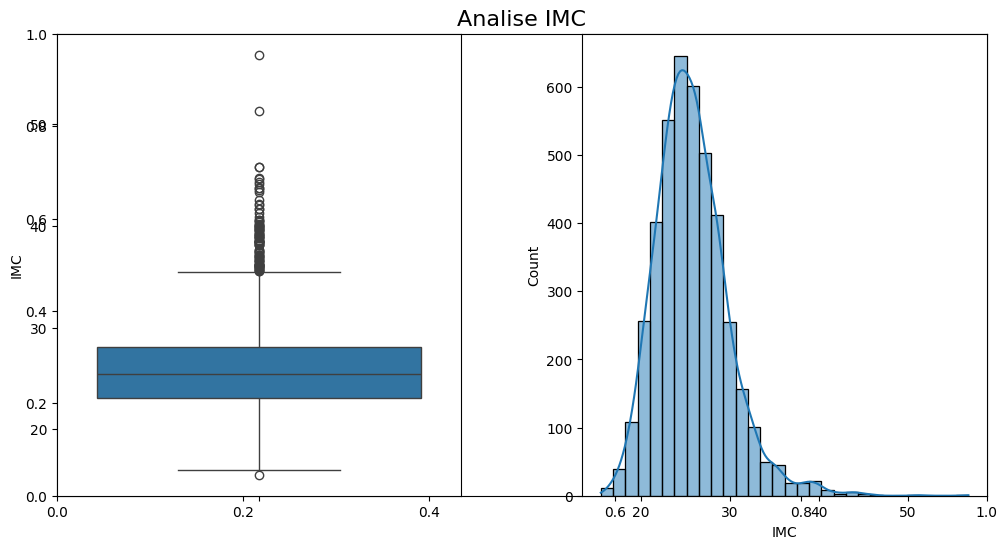

In [16]:
#Coluna IMC

plt.figure(figsize=(12, 6))
plt.title('Analise IMC', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['IMC'])
plt.subplot(1,2,2)
sns.histplot(base['IMC'], kde = True, bins=30)
plt.subplots_adjust(wspace=0.3, hspace=0.4)




In [17]:
# Trocando os NA´s pela mediana

median = sts.median(base['IMC'])
base['IMC'] = base['IMC'].fillna(median)
base.isnull().sum()

sexo                       0
idade                      0
educacao                   0
fumanteAtual               0
cigarrosPorDia             0
medicacaoPA                0
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal            0
pressaoSistolica           0
pressaoDiastolica          0
IMC                        0
frequenciaCardieca         1
glicose                  388
DCdezAnos                  0
dtype: int64

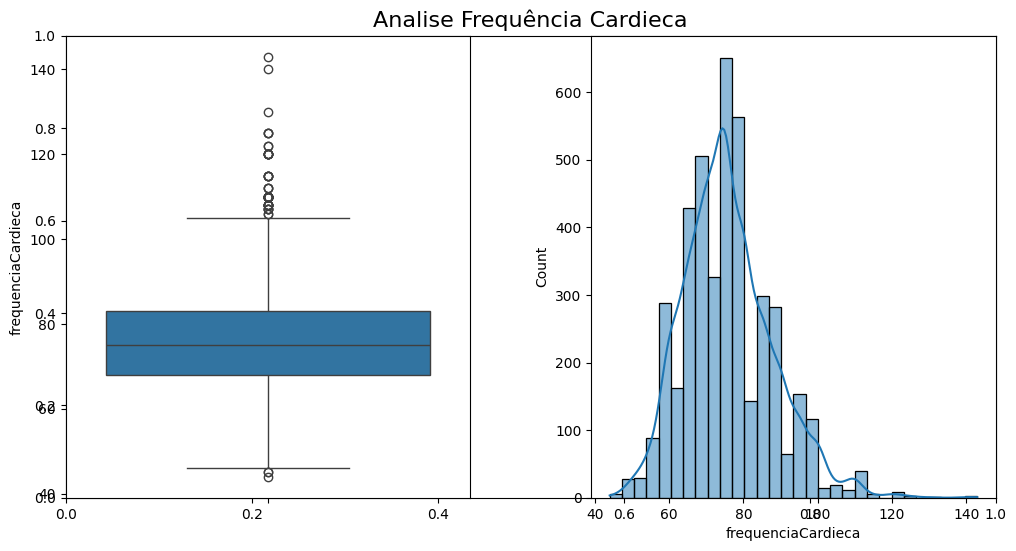

In [18]:
#Coluna frequenciaCardieca

plt.figure(figsize=(12, 6))
plt.title('Analise Frequência Cardieca', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['frequenciaCardieca'])
plt.subplot(1,2,2)
sns.histplot(base['frequenciaCardieca'], kde = True, bins=30)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

In [19]:
# Trocando os NA´s pela mediana

median = sts.median(base['frequenciaCardieca'])
base['frequenciaCardieca'] = base['frequenciaCardieca'].fillna(median)
base.isnull().sum()

sexo                       0
idade                      0
educacao                   0
fumanteAtual               0
cigarrosPorDia             0
medicacaoPA                0
AVCPrevalente              0
hipertensaoPrevalente      0
diabetes                   0
colesterolTotal            0
pressaoSistolica           0
pressaoDiastolica          0
IMC                        0
frequenciaCardieca         0
glicose                  388
DCdezAnos                  0
dtype: int64

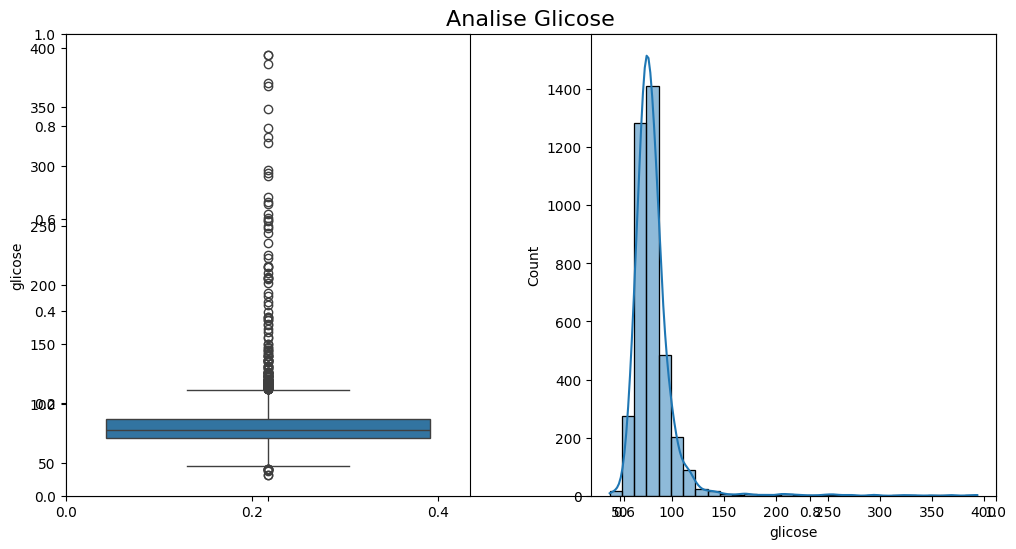

In [20]:
#Coluna glicose

plt.figure(figsize = (12, 6))
plt.title('Analise Glicose', fontsize = 16)
plt.subplot(1,2,1)
sns.boxplot(base['glicose'])
plt.subplot(1,2,2)
sns.histplot(base['glicose'], kde = True, bins = 30)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

In [21]:
# Trocando os NA´s pela mediana

median = sts.median(base['glicose'])
base['glicose'] = base['glicose'].fillna(median)
base.isnull().sum()

sexo                     0
idade                    0
educacao                 0
fumanteAtual             0
cigarrosPorDia           0
medicacaoPA              0
AVCPrevalente            0
hipertensaoPrevalente    0
diabetes                 0
colesterolTotal          0
pressaoSistolica         0
pressaoDiastolica        0
IMC                      0
frequenciaCardieca       0
glicose                  0
DCdezAnos                0
dtype: int64

In [22]:
# Separando a variavel dependente(y), e as variaveis independentes (X)
y = base.iloc[:, 15].values
X = base.iloc[:,:15].values
X

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  48.  ,   2.  , ...,  22.  ,  84.  ,  86.  ],
       [  0.  ,  44.  ,   1.  , ...,  19.16,  86.  ,  67.5 ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [23]:
# Criação do modelo de Regressão Logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo = LogisticRegression(solver='saga',max_iter=500)
modelo.fit(X_scaled,y)

LogisticRegression(max_iter=500, solver='saga')

In [24]:
#Interceção do modelo

modelo.intercept_

array([-1.97526044])

In [25]:
#Angulação do modelo

modelo.coef_

array([[ 0.24765752,  0.53066172, -0.01432573,  0.00400181,  0.25457108,
         0.04118395,  0.07332699,  0.10859793,  0.03242606,  0.0810719 ,
         0.309973  , -0.02744106, -0.00854014, -0.01691779,  0.15276537]])

In [26]:
# Teste de Acuracia

# Previsões do modelo
y_pred = modelo.predict(X_scaled)

# Acurácia
acuracia = accuracy_score(y, y_pred)
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 0.86


# Teste do modelo

Pessoa Ficticia para teste: 

sexo: 1 (masculino)

idade: 55

educacao: 3 (Ensino superior completo)

fumanteAtual: 1 (Sim)

cigarrosPorDia: 15

medicacaoPA: 0 (Não toma medicação para pressão arterial)

AVCPrevalente: 0 (Não teve AVC)

hipertensaoPrevalente: 1 (Tem hipertensão)

diabetes: 0 (Não tem diabetes)

colesterolTotal: 250

pressaoSistolica: 140

pressaoDiastolica: 85

IMC: 27.5

frequenciaCardieca: 80

glicose: 90

In [27]:
pessoa_teste = [[1, 55, 3, 1, 15, 0, 0, 1, 0, 250, 140, 85, 27.5, 80, 90]]

resultado = modelo.predict(pessoa_teste)[0]

if resultado:
    print('A pessoa tem o risco de 10 anos de doença cardíaca coronariana (CHD)')
else:
    print('Sem risco')


A pessoa tem o risco de 10 anos de doença cardíaca coronariana (CHD)
